In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

In [2]:
df = pd.read_csv("Sales Data.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [8]:
df.shape

(185950, 11)

In [9]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [13]:
#to drop off the column not needed
df . drop (columns = ["Unnamed: 0"])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [12]:
df . isnull(). sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [14]:
print(df.dtypes)

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB
None


question1: What is the total sales amount for each city?
City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64


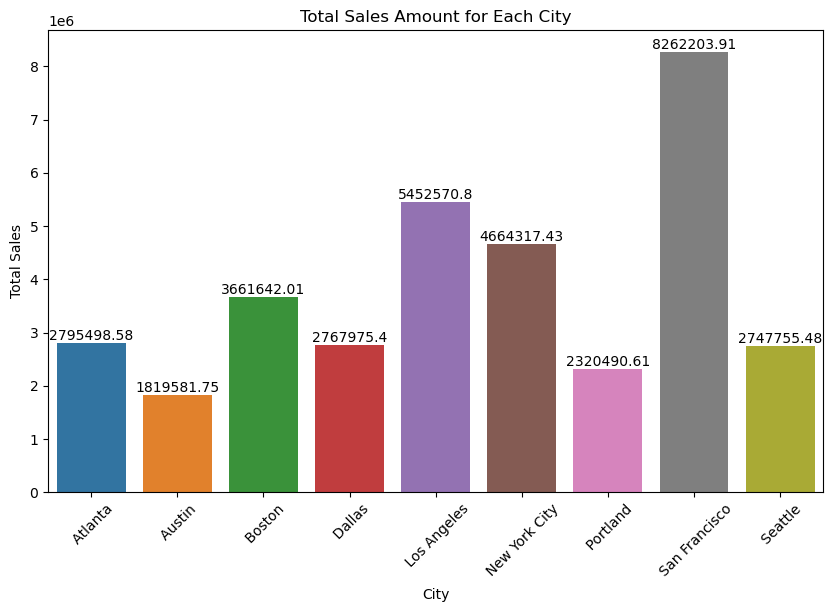

In [60]:
print("question1: What is the total sales amount for each city?")
# Total sales amount for each city
city_sales = df.groupby('City')['Sales'].sum()
print(city_sales)

city_sales = df.groupby('City')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Sales', data=city_sales)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales Amount for Each City')
for index, value in enumerate(city_sales['Sales']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

question2:Which month had the highest sales?
Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64
The month with the highest sales is: 12


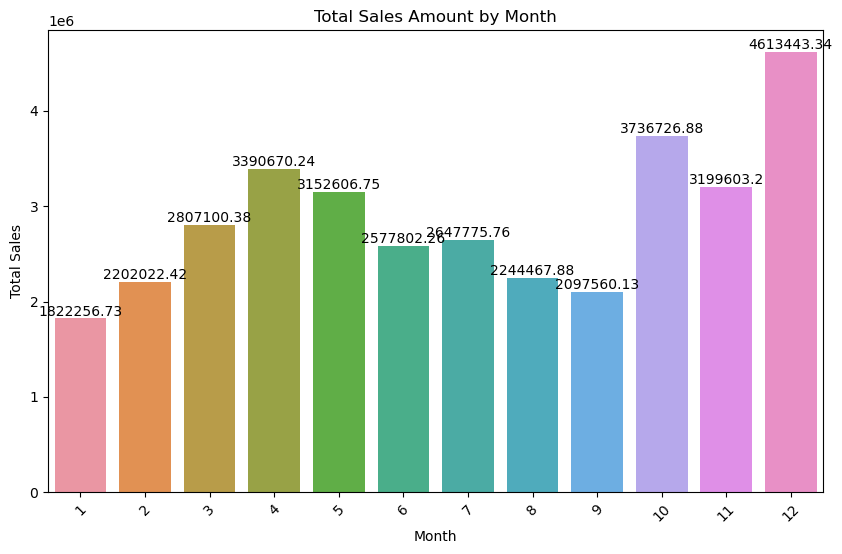

In [61]:
print("question2:Which month had the highest sales?")
# Highest sales by month
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)
highest_sales_month = monthly_sales.idxmax()
print(f'The month with the highest sales is: {highest_sales_month}')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', data=monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Amount by Month')
for index, value in enumerate(monthly_sales['Sales']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

Question3:What is the relationship between order time (Hour) and sales?
Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


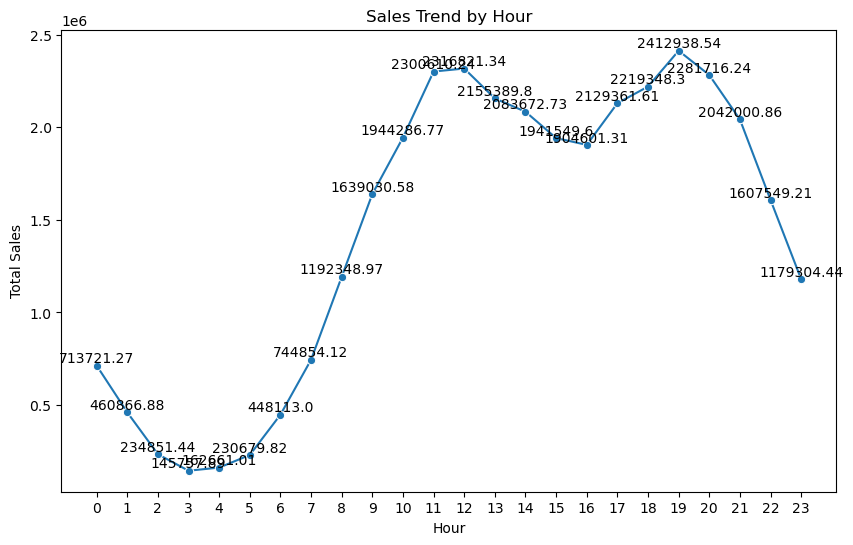

In [62]:
print("Question3:What is the relationship between order time (Hour) and sales?")
# Sales by hour
hourly_sales = df.groupby('Hour')['Sales'].sum()
print(hourly_sales)

hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Sales', data=hourly_sales, marker='o')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Hour')
for index, value in enumerate(hourly_sales['Sales']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.xticks(hourly_sales['Hour'])
plt.show()

Question4: Which products are the best sellers?
Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64


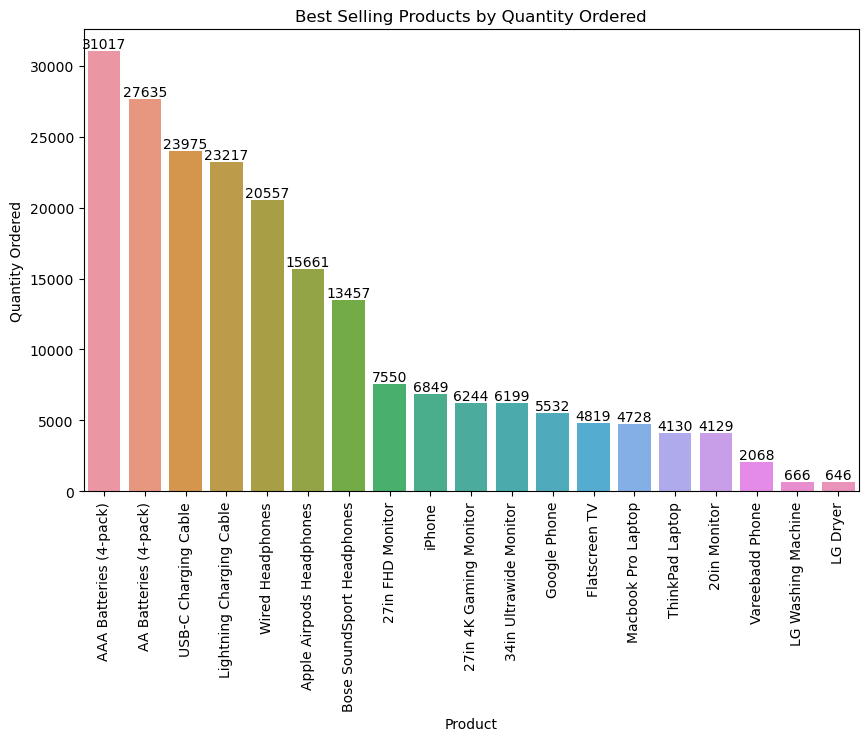

In [63]:
print("Question4: Which products are the best sellers?")
# Best selling products by quantity ordered
best_selling_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
print(best_selling_products)

best_selling_products = df.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Quantity Ordered', data=best_selling_products)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Best Selling Products by Quantity Ordered')
plt.xticks(rotation=90)
for index, value in enumerate(best_selling_products['Quantity Ordered']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()

question5:How does the average order value change by city?
City
 Atlanta          187.856903
 Austin           183.703357
 Boston           183.688272
 Dallas           186.772969
 Los Angeles      184.177362
 New York City    187.502711
 Portland         186.160498
 San Francisco    184.704550
 Seattle          186.516120
Name: Sales, dtype: float64


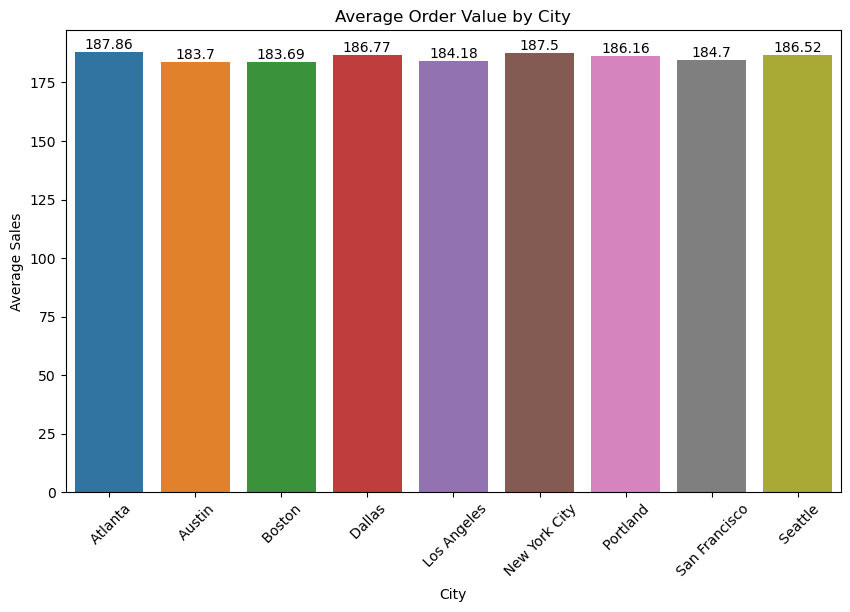

In [64]:
print("question5:How does the average order value change by city?")
# Average order value by city
average_order_value_by_city = df.groupby('City')['Sales'].mean()
print(average_order_value_by_city)

average_order_value_by_city = df.groupby('City')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Sales', data=average_order_value_by_city)
plt.xlabel('City')
plt.ylabel('Average Sales')
plt.title('Average Order Value by City')
for index, value in enumerate(average_order_value_by_city['Sales']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

In [66]:
print("Question6:Are there any specific times of day when certain products are more popular?")
# Product popularity by hour
product_popularity_by_hour = df.groupby(['Hour', 'Product'])['Quantity Ordered'].sum().unstack()
print(product_popularity_by_hour)

Question6:Are there any specific times of day when certain products are more popular?
Product  20in Monitor  27in 4K Gaming Monitor  27in FHD Monitor  \
Hour                                                              
0                  87                     112               184   
1                  42                      78                93   
2                  38                      45                56   
3                  15                      31                52   
4                  17                      33                43   
5                  34                      42                52   
6                  66                      74               105   
7                 106                     121               146   
8                 139                     199               237   
9                 180                     284               366   
10                234                     371               425   
11                267                     4

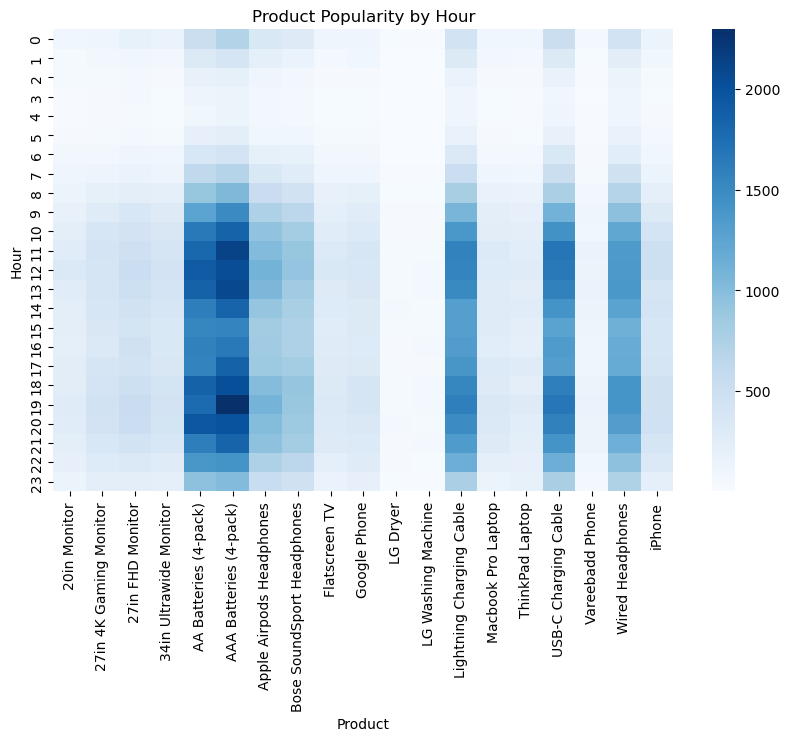

In [67]:
product_popularity_by_hour = df.groupby(['Hour', 'Product'])['Quantity Ordered'].sum().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(product_popularity_by_hour, cmap='Blues')
plt.xlabel('Product')
plt.ylabel('Hour')
plt.title('Product Popularity by Hour')
plt.show()

Question7:How does the sales trend vary across different days of the week?
Day of Week
Friday       4855938.38
Monday       4883326.72
Saturday     4904357.01
Sunday       4932169.66
Thursday     4839465.16
Tuesday      5087956.78
Wednesday    4988822.26
Name: Sales, dtype: float64


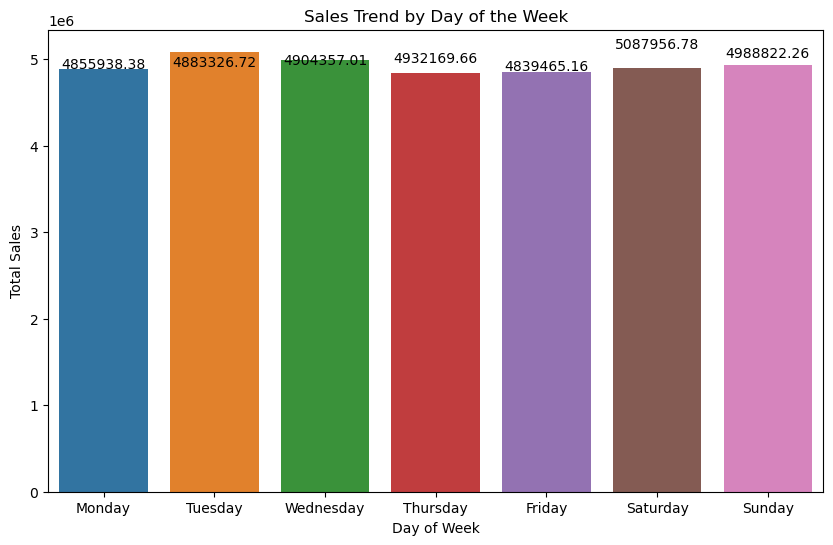

In [68]:
print("Question7:How does the sales trend vary across different days of the week?")
# Adding a new column for day of the week
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Day of Week'] = df['Order Date'].dt.day_name()

# Sales trend by day of the week
sales_by_day_of_week = df.groupby('Day of Week')['Sales'].sum()
print(sales_by_day_of_week)

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Day of Week'] = df['Order Date'].dt.day_name()
sales_by_day_of_week = df.groupby('Day of Week')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of Week', y='Sales', data=sales_by_day_of_week, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Day of the Week')
for index, value in enumerate(sales_by_day_of_week['Sales']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()

question8:Which product combinations are frequently bought together?
[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


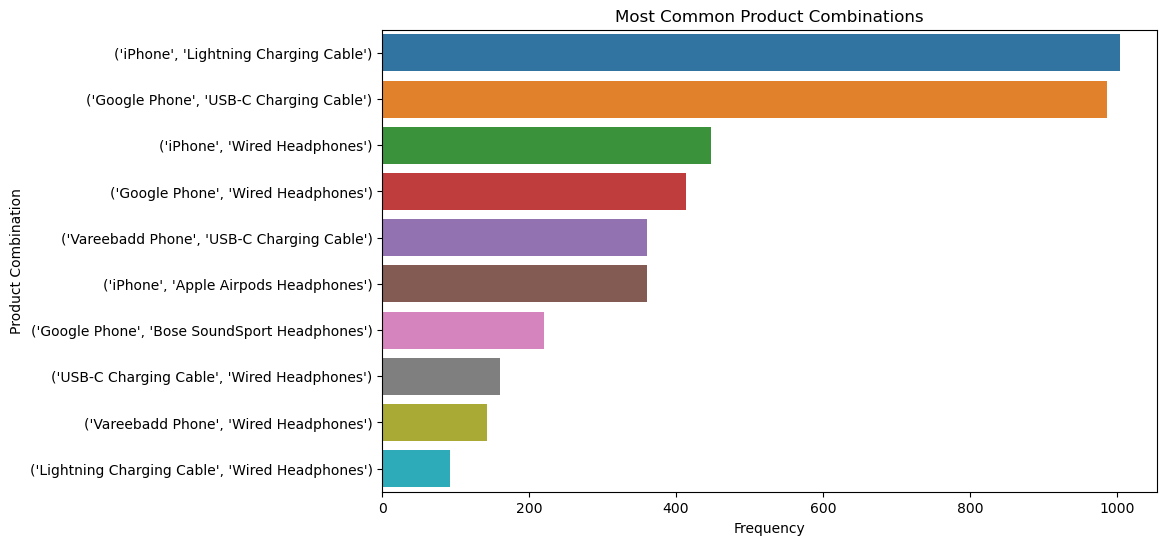

In [71]:
print("question8:Which product combinations are frequently bought together?")
from itertools import combinations
from collections import Counter

# Find pairs of products that are frequently bought together
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Display most common product combinations
print(count.most_common(10))

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
common_combinations = pd.DataFrame(count.most_common(10), columns=['Combination', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Combination', data=common_combinations)
plt.xlabel('Frequency')
plt.ylabel('Product Combination')
plt.title('Most Common Product Combinations')
plt.show()

Question9:What is the impact of the price of a product on the quantity ordered?
                  Price Each  Quantity Ordered
Price Each          1.000000         -0.148272
Quantity Ordered   -0.148272          1.000000


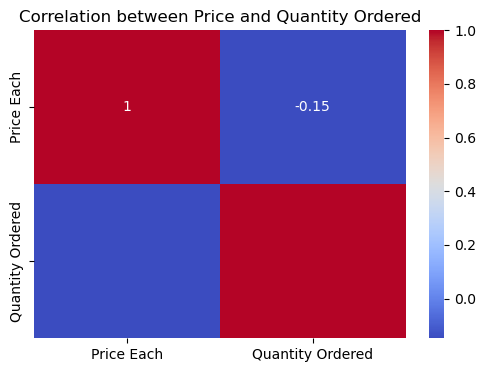

In [72]:
print("Question9:What is the impact of the price of a product on the quantity ordered?")
# Correlation between price and quantity ordered
price_quantity_corr = df[['Price Each', 'Quantity Ordered']].corr()
print(price_quantity_corr)

price_quantity_corr = df[['Price Each', 'Quantity Ordered']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(price_quantity_corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Price and Quantity Ordered')
plt.show()


Geographic Distribution of Sales:
City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Sales, dtype: float64


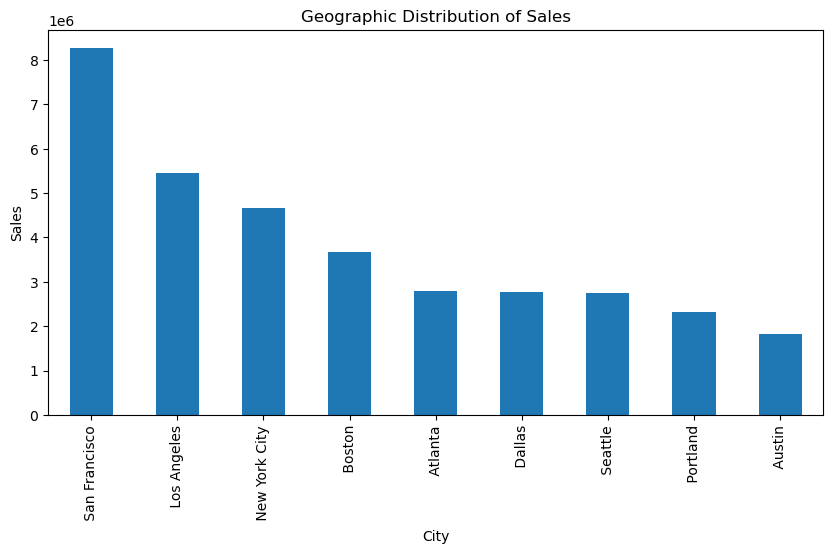

In [14]:
# 10. Geographic Distribution of Sales

# 10. Geographic Distribution of Sales
city_sales_map = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
print("\nGeographic Distribution of Sales:")
print(city_sales_map)

city_sales_map = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales_map.plot(kind='bar', figsize=(10, 5))
plt.title('Geographic Distribution of Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

question11:Are there any noticeable trends in sales growth or decline over time?

Sales Growth or Decline Over Time:
Order Date
2019-01-01 03:07:00     11.99
2019-01-01 03:40:00     11.95
2019-01-01 04:56:00    150.00
2019-01-01 05:53:00      2.99
2019-01-01 06:03:00     23.90
                        ...  
2020-01-01 04:06:00    149.99
2020-01-01 04:13:00      2.99
2020-01-01 04:21:00     11.95
2020-01-01 04:54:00     99.99
2020-01-01 05:13:00    114.94
Name: Sales, Length: 142395, dtype: float64


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


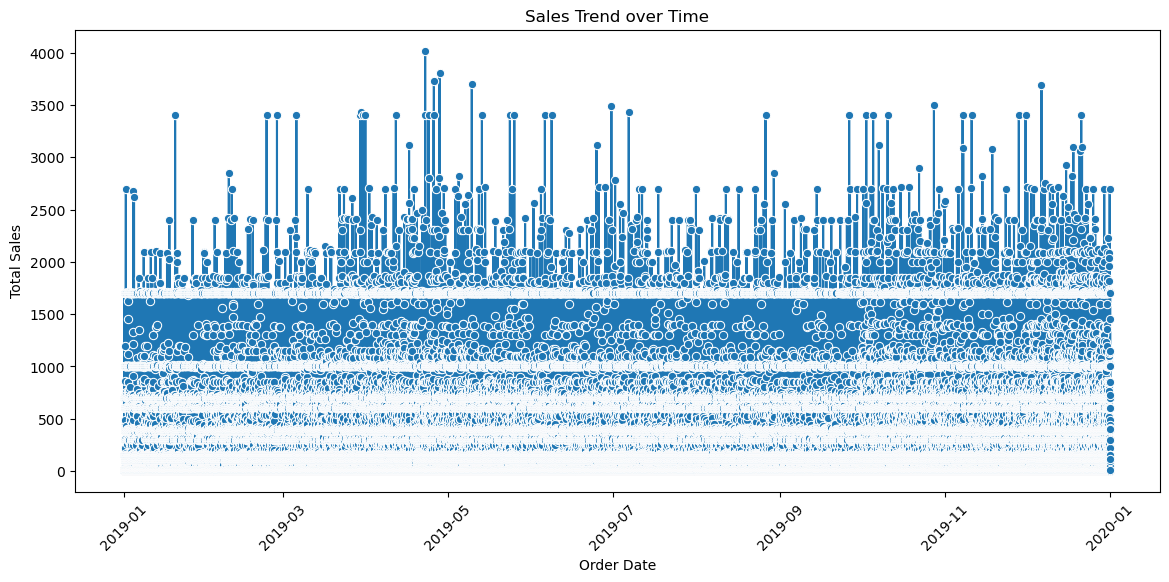

In [74]:
print("question11:Are there any noticeable trends in sales growth or decline over time?")
# 11. Sales Growth or Decline Over Time
sales_over_time = df.groupby('Order Date')['Sales'].sum()
print("\nSales Growth or Decline Over Time:")
print(sales_over_time)

sales_trend = df.groupby('Order Date')['Sales'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_trend, marker='o')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend over Time')
plt.xticks(rotation=45)
plt.show()

In [99]:
print("Question12: How does customer location influence product preferences?")
# 14. Customer Location Influence on Product Preferences
city_product_preference = df.groupby(['City', 'Product'])['Quantity Ordered'].sum().unstack().fillna(0)
print("\nCustomer Location Influence on Product Preferences:")
print(city_product_preference)

Question12: How does customer location influence product preferences?

Customer Location Influence on Product Preferences:
Product         20in Monitor  27in 4K Gaming Monitor  27in FHD Monitor  \
City                                                                     
 Atlanta                 342                     493               588   
 Austin                  230                     318               360   
 Boston                  394                     675               797   
 Dallas                  343                     481               587   
 Los Angeles             658                    1003              1223   
 New York City           560                     842              1072   
 Portland                278                     434               530   
 San Francisco          1000                    1460              1814   
 Seattle                 324                     538               579   

Product         34in Ultrawide Monitor  AA Batteries (4-pack) 

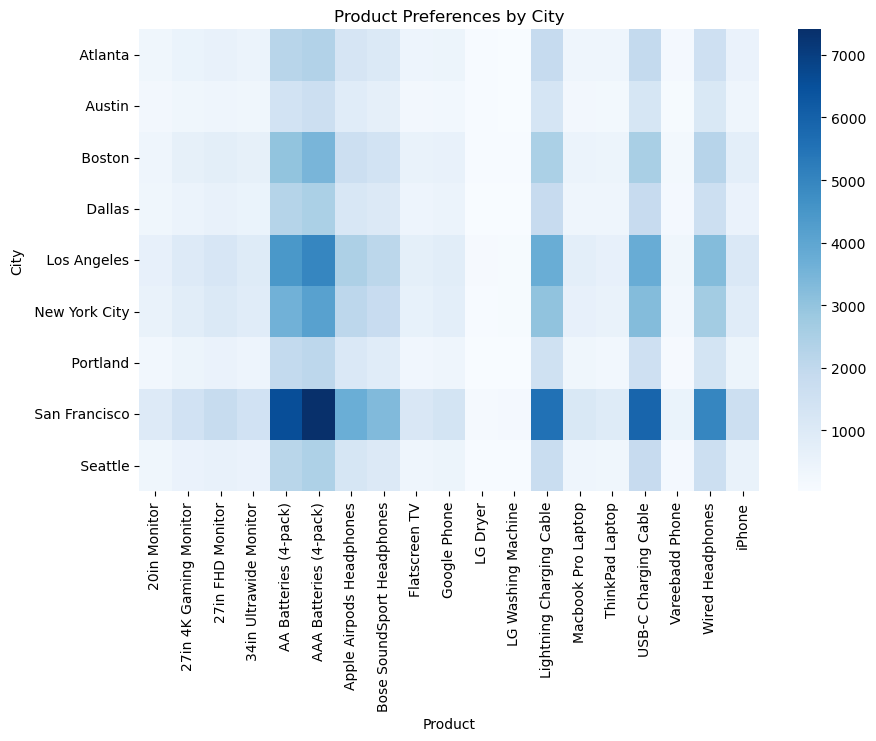

In [100]:
product_preferences_by_city = df.groupby(['City', 'Product'])['Quantity Ordered'].sum().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(product_preferences_by_city, cmap='Blues')
plt.xlabel('Product')
plt.ylabel('City')
plt.title('Product Preferences by City')
plt.show()

question13:Which products have the highest total sales revenue?
Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64


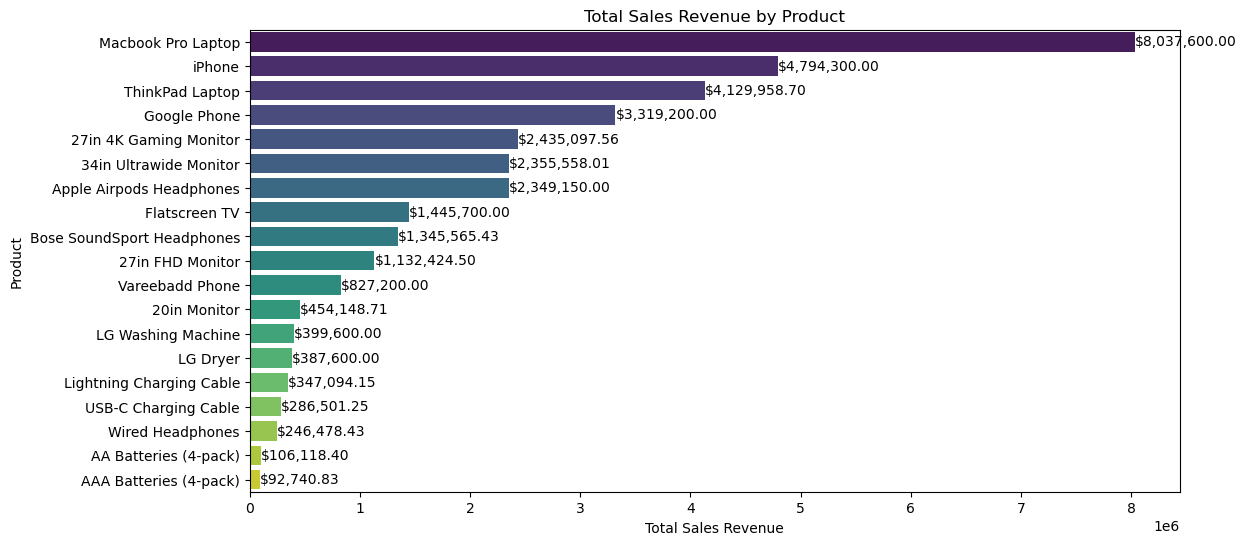

In [35]:
print("question13:Which products have the highest total sales revenue?")
product_sales_revenue = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
print(product_sales_revenue)

# Total sales revenue by product
product_sales_revenue = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales_revenue.values, y=product_sales_revenue.index, palette='viridis')
plt.title('Total Sales Revenue by Product')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Product')

# Adding data labels
for i, value in enumerate(product_sales_revenue.values):
    plt.text(value, i, f'${value:,.2f}', va='center')

plt.show()

question14:What is the average quantity ordered per order for each product?
Product
20in Monitor                  1.006828
27in 4K Gaming Monitor        1.002247
27in FHD Monitor              1.005728
34in Ultrawide Monitor        1.002912
AA Batteries (4-pack)         1.343004
AAA Batteries (4-pack)        1.502689
Apple Airpods Headphones      1.007203
Bose SoundSport Headphones    1.009906
Flatscreen TV                 1.003958
Google Phone                  1.001267
LG Dryer                      1.000000
LG Washing Machine            1.000000
Lightning Charging Cable      1.071983
Macbook Pro Laptop            1.000847
ThinkPad Laptop               1.000484
USB-C Charging Cable          1.094599
Vareebadd Phone               1.001453
Wired Headphones              1.088709
iPhone                        1.001023
Name: Quantity Ordered, dtype: float64


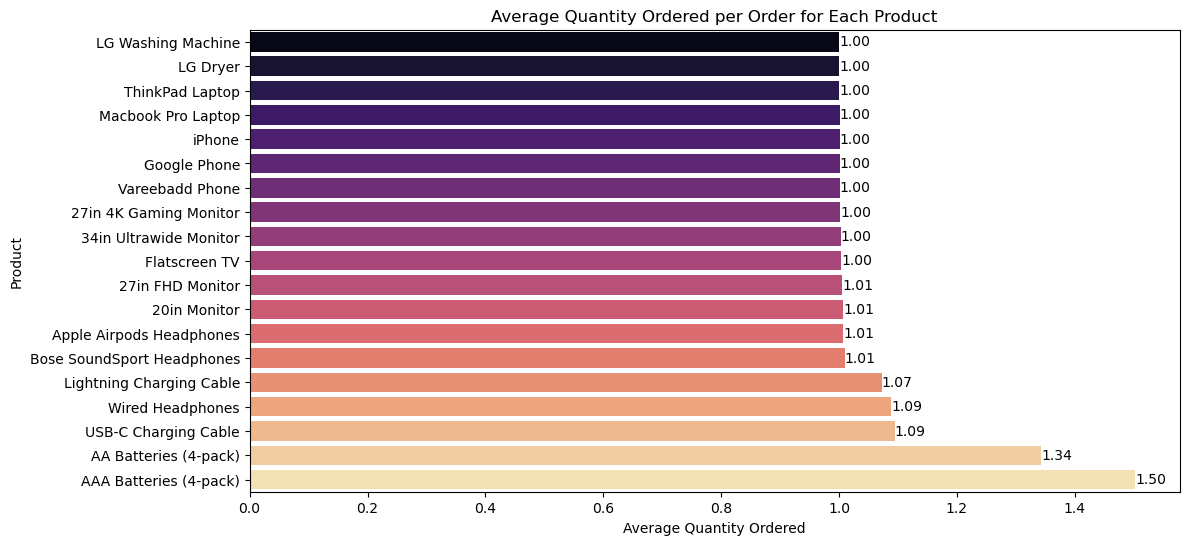

In [37]:
print("question14:What is the average quantity ordered per order for each product?")
# Average quantity ordered per order for each product
average_quantity_per_order = df.groupby('Product')['Quantity Ordered'].mean()
print(average_quantity_per_order)
# Average quantity ordered per order for each product
average_quantity_per_order = df.groupby('Product')['Quantity Ordered'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=average_quantity_per_order.values, y=average_quantity_per_order.index, palette='magma')
plt.title('Average Quantity Ordered per Order for Each Product')
plt.xlabel('Average Quantity Ordered')
plt.ylabel('Product')

# Adding data labels
for i, value in enumerate(average_quantity_per_order.values):
    plt.text(value, i, f'{value:.2f}', va='center')

plt.show()

question15:How does sales performance vary across different regions (e.g., states or zip codes) in the Purchase Address?
State
CA    13714774.71
NY     4664317.43
TX     4587557.15
MA     3661642.01
GA     2795498.58
WA     2747755.48
OR     1870732.34
ME      449758.27
Name: Sales, dtype: float64


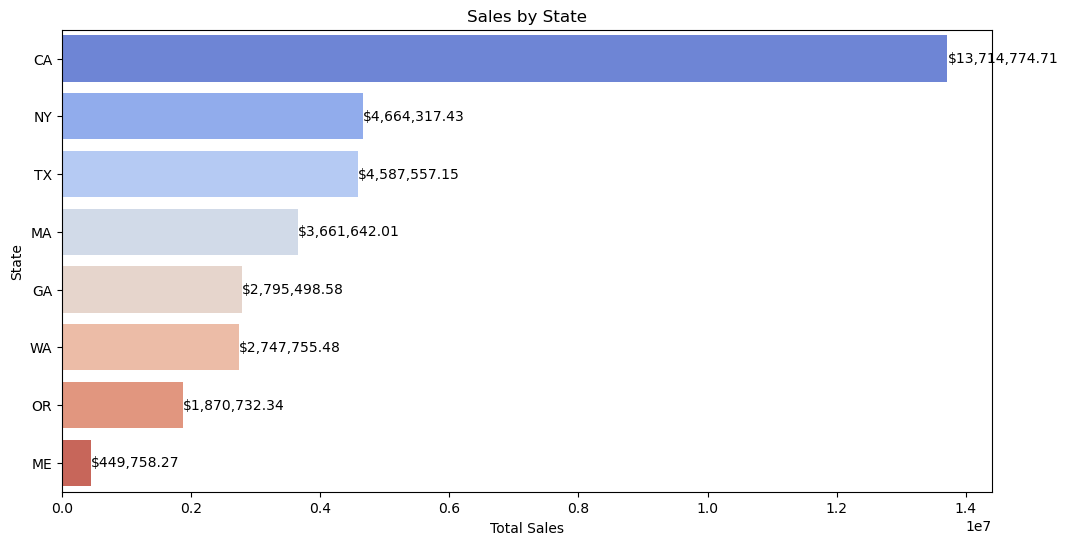

In [38]:
print("question15:How does sales performance vary across different regions (e.g., states or zip codes) in the Purchase Address?")
# Assuming 'Purchase Address' includes state or zip code information
df['State'] = df['Purchase Address'].apply(lambda x: x.split(', ')[-1].split(' ')[0])
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(sales_by_state)
# Assuming 'Purchase Address' includes state information
df['State'] = df['Purchase Address'].apply(lambda x: x.split(', ')[-1].split(' ')[0])
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette='coolwarm')
plt.title('Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')

# Adding data labels
for i, value in enumerate(sales_by_state.values):
    plt.text(value, i, f'${value:,.2f}', va='center')

plt.show()

question16:What is the distribution of order sizes (quantity ordered) across different products?
Quantity Ordered                  1       2       3      4      5     6     7  \
Product                                                                         
20in Monitor                 4073.0    28.0     0.0    0.0    0.0   0.0   0.0   
27in 4K Gaming Monitor       6216.0    14.0     0.0    0.0    0.0   0.0   0.0   
27in FHD Monitor             7464.0    43.0     0.0    0.0    0.0   0.0   0.0   
34in Ultrawide Monitor       6163.0    18.0     0.0    0.0    0.0   0.0   0.0   
AA Batteries (4-pack)       15333.0  3874.0  1033.0  250.0   69.0  16.0   2.0   
AAA Batteries (4-pack)      13726.0  4630.0  1502.0  524.0  166.0  63.0  22.0   
Apple Airpods Headphones    15438.0   110.0     1.0    0.0    0.0   0.0   0.0   
Bose SoundSport Headphones  13195.0   128.0     2.0    0.0    0.0   0.0   0.0   
Flatscreen TV                4781.0    19.0     0.0    0.0    0.0   0.0   0.0   
Google Phone

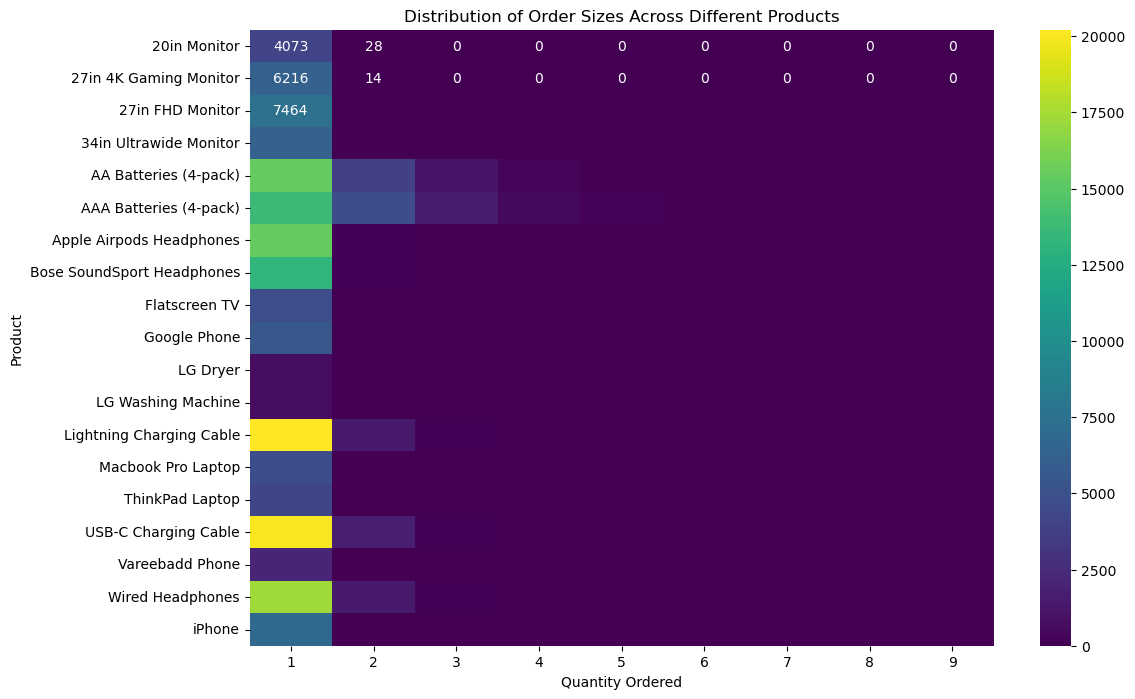

In [41]:
print("question16:What is the distribution of order sizes (quantity ordered) across different products?")
# Distribution of order sizes across products
order_size_distribution = df.groupby('Product')['Quantity Ordered'].value_counts().unstack().fillna(0)
print(order_size_distribution)

# Distribution of order sizes across products
order_size_distribution = df.groupby('Product')['Quantity Ordered'].value_counts().unstack().fillna(0)

# Creating the DataFrame from the provided data
data = {
    'Product': [
        '20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 
        'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 
        'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 
        'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone'
    ],
    '1': [4073, 6216, 7464, 6163, 15333, 13726, 15438, 13195, 4781, 5518, 646, 666, 20210, 4720, 4126, 20019, 2062, 17361, 6835],
    '2': [28, 14, 43, 18, 3874, 4630, 110, 128, 19, 7, 0, 0, 1344, 4, 2, 1713, 3, 1380, 7],
    '3': [0, 0, 0, 0, 1033, 1502, 1, 2, 0, 0, 0, 0, 97, 0, 0, 157, 0, 128, 0],
    '4': [0, 0, 0, 0, 250, 524, 0, 0, 0, 0, 0, 0, 7, 0, 0, 12, 0, 13, 0],
    '5': [0, 0, 0, 0, 69, 166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    '6': [0, 0, 0, 0, 16, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    '7': [0, 0, 0, 0, 2, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    '8': [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    '9': [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)
df.set_index('Product', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt=".0f", cmap='viridis', cbar=True)
plt.title('Distribution of Order Sizes Across Different Products')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()

question17:How can we identify repeat customers using the 'sales'?
Sales from repeat customers: 34492035.97
Percentage of total sales from repeat customers: 100.00%


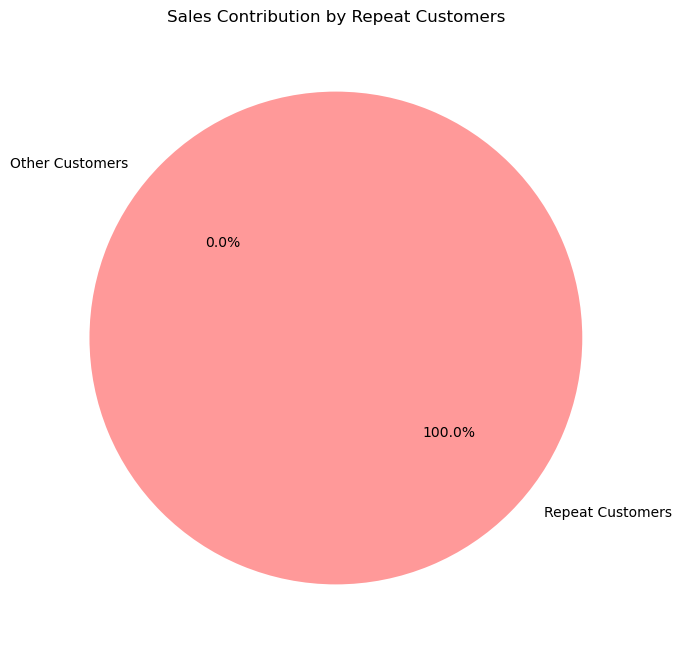

In [86]:
print("question17:How can we identify repeat customers using the 'sales'?")
df['Customer ID'] = df['Purchase Address'].apply(lambda x: x.split(' ')[-1])  # Example: using the last part of the address as customer ID
repeat_customers = df.groupby('Customer ID')['Order ID'].nunique()
repeat_customers = repeat_customers[repeat_customers > 1].index

# Total sales from repeat customers
sales_from_repeat_customers = df[df['Customer ID'].isin(repeat_customers)]['Sales'].sum()
total_sales = df['Sales'].sum()

print(f'Sales from repeat customers: {sales_from_repeat_customers}')
print(f'Percentage of total sales from repeat customers: {sales_from_repeat_customers / total_sales * 100:.2f}%')
# Identifying repeat customers using 'Purchase Address' or other unique identifier
df['Customer ID'] = df['Purchase Address'].apply(lambda x: x.split(' ')[-1])  # Example: using the last part of the address as customer ID
repeat_customers = df.groupby('Customer ID')['Order ID'].nunique()
repeat_customers = repeat_customers[repeat_customers > 1].index

# Total sales from repeat customers
sales_from_repeat_customers = df[df['Customer ID'].isin(repeat_customers)]['Sales'].sum()
total_sales = df['Sales'].sum()
repeat_customer_percentage = (sales_from_repeat_customers / total_sales) * 100

# Plotting
labels = ['Repeat Customers', 'Other Customers']
sizes = [sales_from_repeat_customers, total_sales - sales_from_repeat_customers]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sales Contribution by Repeat Customers')

plt.show()

question17:How can we identify repeat customers using the 'count of orders'?


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


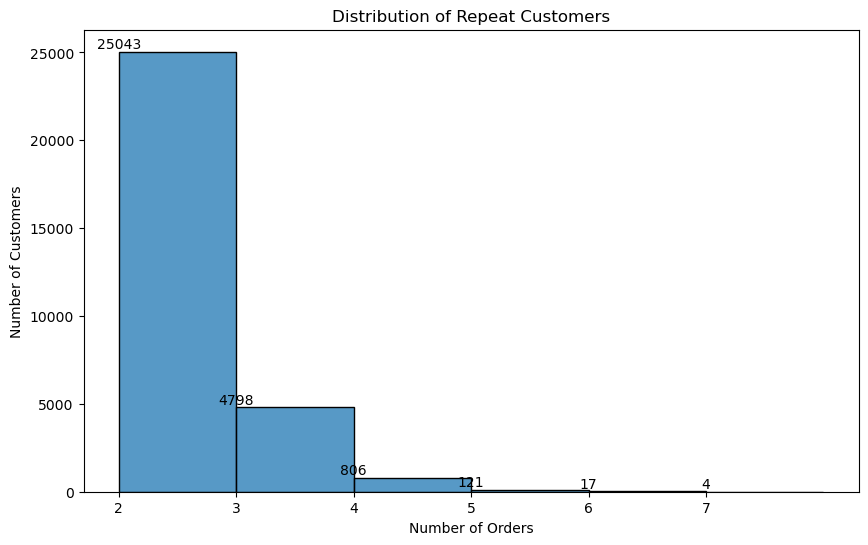

Total repeat customers: 30789
Maximum orders by a single customer: 7


In [101]:
print("question17:How can we identify repeat customers using the 'count of orders'?")
# Identifying repeat customers using 'Purchase Address'
repeat_customers = df.groupby('Purchase Address')['Order ID'].nunique().reset_index()
repeat_customers.columns = ['Purchase Address', 'Order Count']

# Filter for repeat customers
repeat_customers = repeat_customers[repeat_customers['Order Count'] > 1]

# Plot the distribution of repeat customers
plt.figure(figsize=(10, 6))
sns.histplot(repeat_customers['Order Count'], bins=range(2, repeat_customers['Order Count'].max() + 2), kde=False)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Repeat Customers')
plt.xticks(range(2, repeat_customers['Order Count'].max() + 1))
for index, value in enumerate(repeat_customers['Order Count'].value_counts().sort_index()):
    plt.text(index + 2, value, str(value), ha='center', va='bottom')
plt.show()

# Print summary statistics of repeat customers
print(f"Total repeat customers: {len(repeat_customers)}")
print(f"Maximum orders by a single customer: {repeat_customers['Order Count'].max()}")

Question18:Are there seasonal trends in product sales?


<Figure size 1400x800 with 0 Axes>

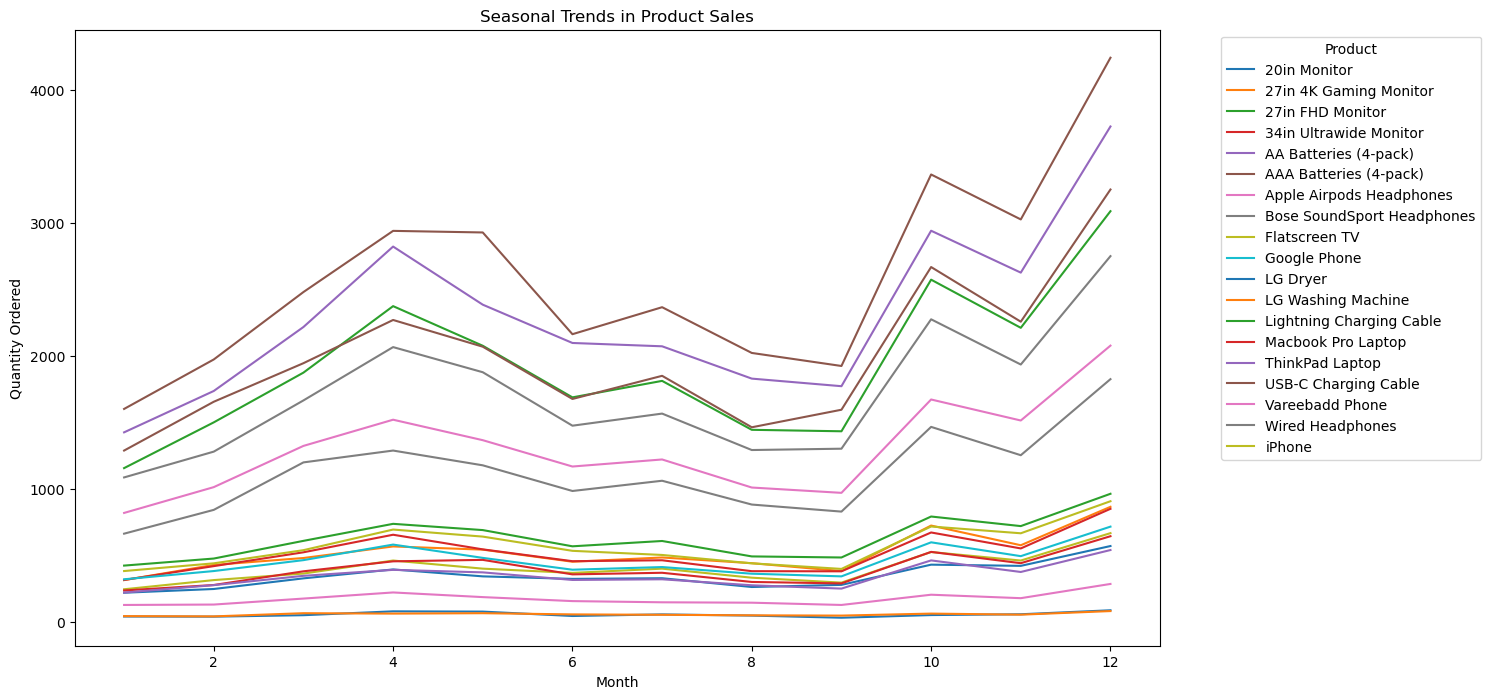

In [96]:
print("Question18:Are there seasonal trends in product sales?")
# Add month column to dataframe
df['Month'] = df['Order Date'].dt.month

# Calculate total quantity ordered for each product by month
seasonal_trends = df.groupby(['Month', 'Product'])['Quantity Ordered'].sum().unstack().fillna(0)

# Plot seasonal trends in product sales
plt.figure(figsize=(14, 8))
seasonal_trends.plot(kind='line', figsize=(14, 8))
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.title('Seasonal Trends in Product Sales')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


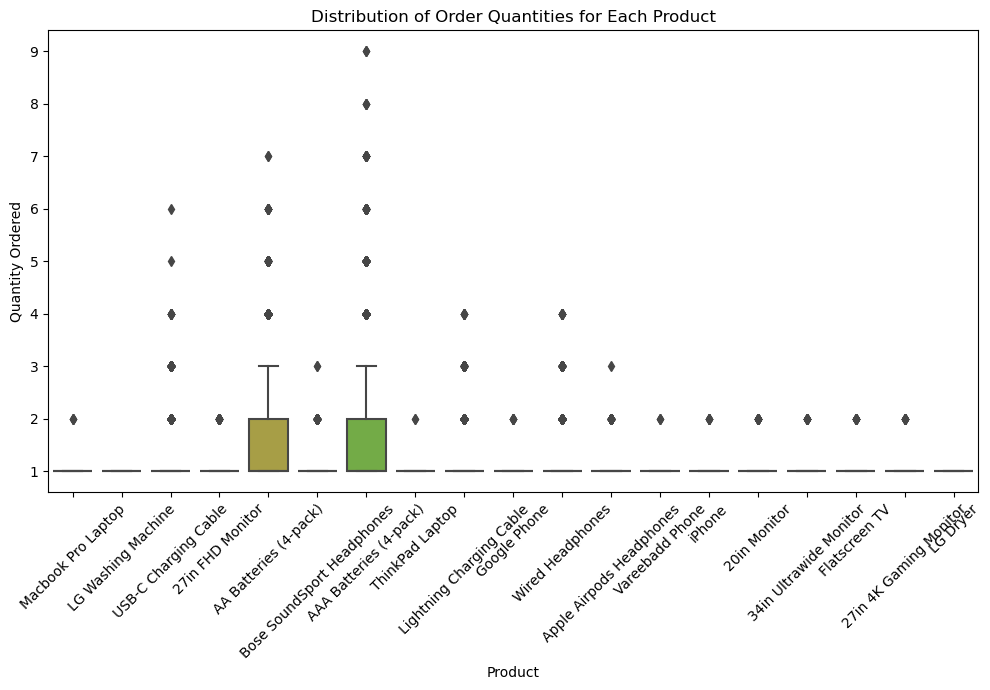

In [102]:
# Calculate descriptive statistics for order quantities for each product
order_quantity_distribution = df.groupby('Product')['Quantity Ordered'].describe()

# Plot the distribution of order quantities
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Quantity Ordered', data=df)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Distribution of Order Quantities for Each Product')
plt.xticks(rotation=45)
plt.show()
